<a href="https://colab.research.google.com/github/originalsidd/Pokedex/blob/main/Pokedex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import keras

In [ ]:
!wget "https://www.dropbox.com/sh/s9r1av3m4eatd3y/AAA8zYti5b5tnyKfcah2Reaja"

--2020-10-19 04:35:43--  https://www.dropbox.com/sh/s9r1av3m4eatd3y/AAA8zYti5b5tnyKfcah2Reaja
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/s9r1av3m4eatd3y/AAA8zYti5b5tnyKfcah2Reaja [following]
--2020-10-19 04:35:43--  https://www.dropbox.com/sh/raw/s9r1av3m4eatd3y/AAA8zYti5b5tnyKfcah2Reaja
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca4193be12b512492feae10bb00.dl.dropboxusercontent.com/zip_download_get/Ak4tHYBcIcUmjlWREaVBaevEZve3BRCgtA987SL69iQ_rqSAY1K4ktbkz4gNoOBOqz__5EIbwsurpCUnVG7T35BvyzfuKgVo5KhapIdL-MYLkw [following]
--2020-10-19 04:35:44--  https://uca4193be12b512492feae10bb00.dl.dropboxusercontent.com/zip_download_get/Ak4tHYBcIcUmjlWREaVBaevEZve3BRCgtA987SL69iQ_rqSAY1K4ktbkz4gNoOBOqz__5EIbwsurpCUnVG7T35Bvy

In [ ]:
!unzip AAA8zYti5b5tnyKfcah2Reaja -d dataset/

Archive:  AAA8zYti5b5tnyKfcah2Reaja
mapname:  conversion of  failed
   creating: dataset/Test/
   creating: dataset/Train/
   creating: dataset/Test/Pikachu/
   creating: dataset/Train/Pikachu/
   creating: dataset/Test/Bulbasaur/
   creating: dataset/Test/Charmander/
   creating: dataset/Train/Bulbasaur/
   creating: dataset/Train/Charmander/
 extracting: dataset/Train/Pikachu/348.jpg  
 extracting: dataset/Train/Pikachu/319.jpg  
 extracting: dataset/Test/Pikachu/2032.jpg  
 extracting: dataset/Test/Pikachu/2011.jpg  
 extracting: dataset/Train/Pikachu/378.jpg  
 extracting: dataset/Train/Pikachu/344.jpg  
 extracting: dataset/Train/Pikachu/379.jpg  
 extracting: dataset/Train/Pikachu/363.jpg  
 extracting: dataset/Train/Pikachu/385.jpg  
 extracting: dataset/Train/Pikachu/302.jpg  
 extracting: dataset/Test/Pikachu/2000.jpg  
 extracting: dataset/Train/Pikachu/313.jpg  
 extracting: dataset/Train/Pikachu/309.jpg  
 extracting: dataset/Train/Pikachu/342.jpg  
 extracting: dataset/Tra

##Image Augmentation/ Data Generator/ Data Loader

In [ ]:
from keras.preprocessing import image

In [ ]:
train_datagen=image.ImageDataGenerator(rotation_range=20,
                         width_shift_range=0.2,
                         height_shift_range=0.2,
                         shear_range=0.2,
                         zoom_range=0.3,
                         horizontal_flip=True,
                         rescale=1/255.
                         )

In [ ]:
val_datagen=image.ImageDataGenerator(rescale=1/255.)

In [ ]:
train_generator=train_datagen.flow_from_directory("dataset/Train", target_size=(100,100))

Found 304 images belonging to 3 classes.


In [ ]:
train_generator.class_indices

{'Bulbasaur': 0, 'Charmander': 1, 'Pikachu': 2}

In [ ]:
imgs, labels=next(train_generator)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
imgs[0]

array([[[1.        , 0.9921569 , 0.9843138 ],
        [1.        , 0.9921569 , 0.9843138 ],
        [1.        , 0.9921569 , 0.9843138 ],
        ...,
        [1.        , 0.9921569 , 0.9843138 ],
        [1.        , 0.9921569 , 0.9843138 ],
        [1.        , 0.9921569 , 0.9843138 ]],

       [[1.        , 0.9921569 , 0.9843138 ],
        [1.        , 0.9921569 , 0.9843138 ],
        [1.        , 0.9921569 , 0.9843138 ],
        ...,
        [1.        , 0.9921569 , 0.9843138 ],
        [1.        , 0.9921569 , 0.9843138 ],
        [1.        , 0.9921569 , 0.9843138 ]],

       [[1.        , 0.9921569 , 0.9843138 ],
        [1.        , 0.9921569 , 0.9843138 ],
        [1.        , 0.9921569 , 0.9843138 ],
        ...,
        [1.        , 0.9921569 , 0.9843138 ],
        [1.        , 0.9921569 , 0.9843138 ],
        [1.        , 0.9921569 , 0.9843138 ]],

       ...,

       [[0.6862745 , 0.6627451 , 0.5686275 ],
        [0.6862745 , 0.6627451 , 0.5686275 ],
        [0.6901904 , 0

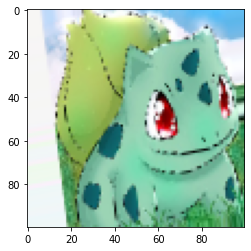

In [ ]:
plt.imshow(imgs[1])

In [ ]:
labels[1]

array([1., 0., 0.], dtype=float32)

In [ ]:
val_generator=val_datagen.flow_from_directory("dataset/Test", target_size=(100,100))

Found 123 images belonging to 3 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense # ANN layers are Dense

In [ ]:
model = Sequential()
 # input shape is only required for the first layer 
model.add( Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(100,100,3)))
model.add( MaxPool2D(pool_size=(2,2)))

model.add( Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add( MaxPool2D(pool_size=(2,2)))

model.add( Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add( MaxPool2D(pool_size=(2,2)))

model.add( Conv2D(filters=128, kernel_size=(3,3), activation="relu"))
model.add( Flatten())

model.add( Dense(units=3, activation="softmax"))

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 128)        

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

In [ ]:
hist=model.fit_generator(train_generator, steps_per_epoch=304//32, epochs=10, validation_data=val_generator, validation_steps=123//32)

Epoch 1/10
1/9 [==>...........................] - ETA: 0s - loss: 0.1484 - accuracy: 0.9062

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


9/9 [==============================] - 12s 1s/step - loss: 0.2125 - accuracy: 0.9228 - val_loss: 0.1524 - val_accuracy: 0.9583
Epoch 2/10
9/9 [==============================] - 11s 1s/step - loss: 0.1630 - accuracy: 0.9596 - val_loss: 0.1665 - val_accuracy: 0.9479
Epoch 3/10
9/9 [==============================] - 11s 1s/step - loss: 0.1924 - accuracy: 0.9301 - val_loss: 0.2555 - val_accuracy: 0.9167
Epoch 4/10
9/9 [==============================] - 11s 1s/step - loss: 0.2029 - accuracy: 0.9375 - val_loss: 0.1797 - val_accuracy: 0.9479
Epoch 5/10
9/9 [==============================] - 11s 1s/step - loss: 0.2048 - accuracy: 0.9265 - val_loss: 0.1672 - val_accuracy: 0.9271
Epoch 6/10
9/9 [==============================] - 11s 1s/step - loss: 0.2191 - accuracy: 0.9338 - val_loss: 0.1332 - val_accuracy: 0.9792
Epoch 7/10
9/9 [==============================] - 11s 1s/step - loss: 0.2131 - accuracy: 0.9449 - val_loss: 0.1248 - val_accuracy: 0.9688
Epoch 8/10
9/9 [=============================

In [ ]:
model_history=hist.history

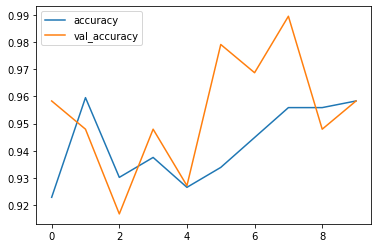

In [ ]:
plt.plot(model_history['accuracy'], label='accuracy')
plt.plot(model_history['val_accuracy'], label='val_accuracy')
plt.legend()

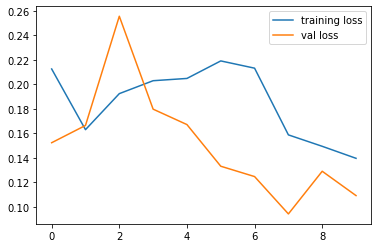

In [ ]:
plt.plot(model_history['loss'], label='training loss')
plt.plot(model_history['val_loss'], label='val loss')
plt.legend()

In [ ]:
model.evaluate(val_generator)

4/4 [==============================] - 2s 470ms/step - loss: 0.1259 - accuracy: 0.9512


[0.125860795378685, 0.9512194991111755]

In [ ]:
test_img=image.load_img("./pic.jpg", target_size=(100,100))
test_img=np.array(test_img)/255.

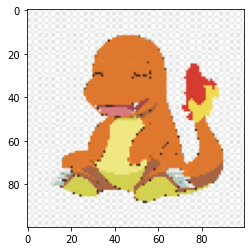

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img=test_img.reshape(1,100,100,3)
pred=model.predict_classes(test_img)

In [ ]:
 dic=train_generator.class_indices

In [ ]:
rev_dic={v:k for k,v in dic.items()}

In [ ]:
dic

{'Bulbasaur': 0, 'Charmander': 1, 'Pikachu': 2}

In [ ]:
rev_dic

{0: 'Bulbasaur', 1: 'Charmander', 2: 'Pikachu'}

In [ ]:
rev_dic[pred[0]]

'Charmander'

#Test for new images

In [ ]:
test_img2=image.load_img("./pic2.jpg", target_size=(100,100))
test_img2=np.array(test_img)/255.

TypeError: ignored

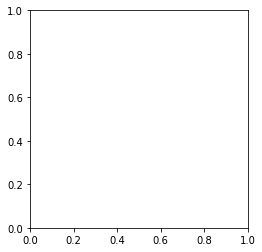

In [ ]:
plt.imshow(test_img2)

In [ ]:
test_img2=test_img2.reshape(1,100,100,3)
pred=model.predict_classes(test_img2)

In [ ]:
dic=train_generator.class_indices

In [ ]:
pred

array([1])